## Plotting



### Plot customizations - Modifying line, text and figure properties



[Matlab post](http://matlab.cheme.cmu.edu/2011/08/01/plot-customizations-modifying-line-text-and-figure-properties/)

Here is a vanilla plot.



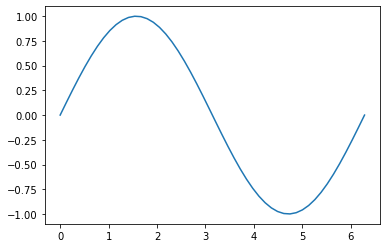

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
plt.plot(x, np.sin(x));

Lets increase the line thickness, change the line color to red, and make the markers red circles with black outlines. I also like figures in presentations to be 6 inches high, and 4 inches wide.



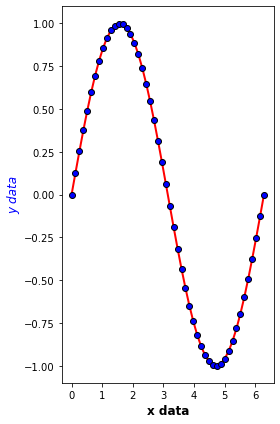

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)

plt.figure(figsize=(4, 6))
plt.plot(x, np.sin(x), lw=2, color='r', marker='o', mec='k', mfc='b')

plt.xlabel('x data', fontsize=12, fontweight='bold')
plt.ylabel('y data', fontsize=12, fontstyle='italic', color='b')
plt.tight_layout(); # auto-adjust position of axes to fit figure.

#### setting all the text properties in a figure.



You may notice the axis tick labels are not consistent with the labels now. If you have many plots it can be tedious to try setting each text property. Python to the rescue! With these commands you can find all the text instances, and change them all at one time! Likewise, you can change all the lines, and all the axes.



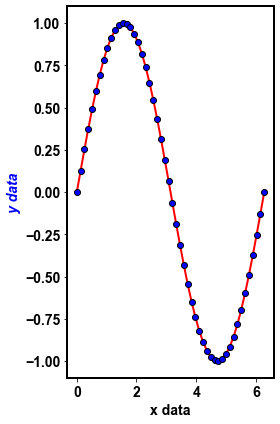

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)

plt.figure(figsize=(4, 6))
plt.plot(x, np.sin(x), lw=2, color='r', marker='o', mec='k', mfc='b')

plt.xlabel('x data', fontsize=12, fontweight='bold')
plt.ylabel('y data', fontsize=12, fontstyle='italic', color='b')

# set all font properties
fig = plt.gcf()
for o in  fig.findobj(lambda x:hasattr(x, 'set_fontname')
		      or hasattr(x, 'set_fontweight')
		      or hasattr(x, 'set_fontsize')):
    o.set_fontname('Arial')
    o.set_fontweight('bold')
    o.set_fontsize(14)

# make anything you can set linewidth to be lw=2
def myfunc(x):
    return hasattr(x, 'set_linewidth')

for o in  fig.findobj(myfunc):
    o.set_linewidth(2)

plt.tight_layout(); # auto-adjust position of axes to fit figure.

There are many other things you can do!



### Plotting two datasets with very different scales



[Matlab plot](http://matlab.cheme.cmu.edu/2011/08/25/plotting-two-datasets-with-very-different-scales/)

Sometimes you will have two datasets you want to plot together, but the scales will be so different it is hard to seem them both in the same plot. Here we examine a few strategies to plotting this kind of data.



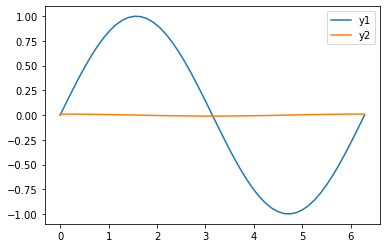

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi)
y1 = np.sin(x);
y2 = 0.01 * np.cos(x);

plt.plot(x, y1, x, y2)
plt.legend(['y1', 'y2']);
# in this plot y2 looks almost flat!

#### Make two plots!



this certainly solves the problem, but you have two full size plots, which can take up a lot of space in a presentation and report. Often your goal in plotting both data sets is to compare them, and it is easiest to compare plots when they are perfectly lined up. Doing that manually can be tedious.



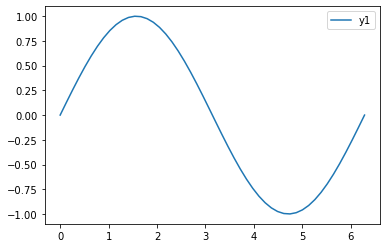

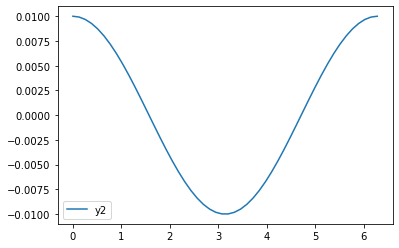

In [5]:
plt.figure()
plt.plot(x,y1)
plt.legend(['y1'])

plt.figure()
plt.plot(x,y2)
plt.legend(['y2']);

#### Scaling the results



Sometimes you can scale one dataset so it has a similar magnitude as the other data set. Here we could multiply y2 by 100, and then it will be similar in size to y1. Of course, you need to indicate that y2 has been scaled in the graph somehow. Here we use the legend.



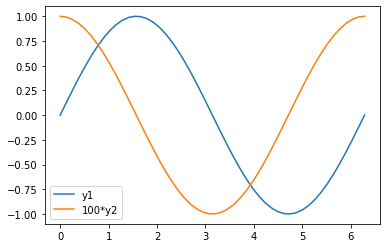

In [6]:
plt.figure()
plt.plot(x, y1, x, 100 * y2)
plt.legend(['y1', '100*y2']);

#### Double-y axis plot



Using two separate y-axes can solve your scaling problem. Note that each y-axis is color coded to the data. It can be difficult to read these graphs when printed in black and white



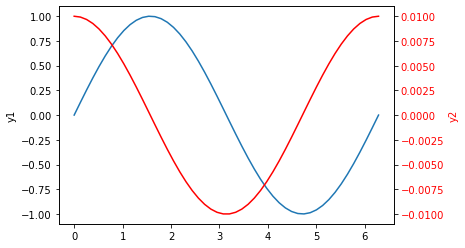

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r');

#### Subplots



An alternative approach to double y axes is to use subplots.



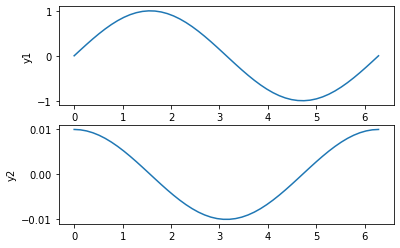

In [8]:
f, axes = plt.subplots(2, 1);
axes[0].plot(x, y1)
axes[0].set_ylabel('y1')

axes[1].plot(x, y2)
axes[1].set_ylabel('y2');

### Customizing plots after the fact



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/16/customizing-plots-after-the-fact/)
Sometimes it is desirable to make a plot that shows the data you want to present, and to customize the details, e.g. font size/type and line thicknesses afterwards. It can be tedious to try to add the customization code to the existing code that makes the plot. Today, we look at a way to do the customization after the plot is created.



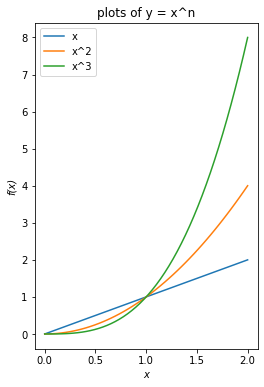

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
x = np.linspace(0,2)
y1 = x
y2 = x**2
y3 = x**3

plt.plot(x, y1, x, y2, x, y3)
xL = plt.xlabel('x')
yL = plt.ylabel('f(x)')
plt.title('plots of y = x^n')
plt.legend(['x', 'x^2', 'x^3'], loc='best');

plt.setp(f, 'size_inches', (4, 6))


# set lines to dashed
from matplotlib.lines import Line2D
for o in fig.findobj(Line2D):
    o.set_linestyle('--')

#set(allaxes,'FontName','Arial','FontWeight','Bold','LineWidth',2,'FontSize',14);

import matplotlib.text as text
for o in fig.findobj(text.Text):
    plt.setp(o, 'fontname','Arial', 'fontweight','bold', 'fontsize', 14)

plt.setp(xL, 'fontstyle', 'italic')
plt.setp(yL, 'fontstyle', 'italic');

### Fancy, built-in colors in Python



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/13/check-out-the-new-fall-colors/)

Matplotlib has a lot of built-in colors. Here is a list of them, and an example of using them.



dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

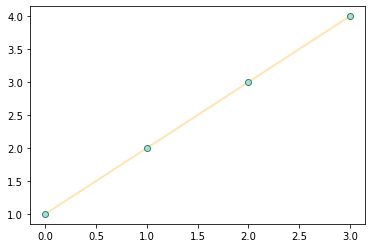

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
print(cnames.keys())

plt.plot([1, 2, 3, 4], lw=2, color='moccasin', marker='o', mfc='lightblue', mec='seagreen');

### Picasso's short lived blue period with Python



[Matlab post](http://matlab.cheme.cmu.edu/2011/09/14/picassos-short-lived-blue-period-with-matlab/)

It is an unknown fact that Picasso had a brief blue plotting period with Matlab before moving on to his more famous paintings. It started from irritation with the default colors available in Matlab for plotting. After watching his friend van Gogh cut off his own ear out of frustration with the ugly default colors, Picasso had to do something different.



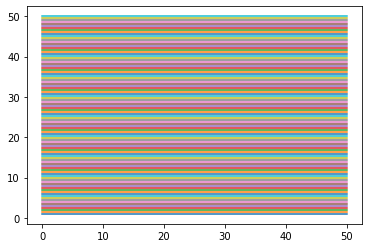

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#this plots horizontal lines for each y value of m.
for m in np.linspace(1, 50, 100):
    plt.plot([0, 50], [m, m]);

Picasso copied the table available at [http://en.wikipedia.org/wiki/List_of_colors>](http://en.wikipedia.org/wiki/List_of_colors>)and parsed it into a dictionary of hex codes for new colors. That allowed him to specify a list of beautiful blues for his graph. Picasso eventually gave up on python as an artform, and moved on to painting.



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

c = {}
with open('../color.table') as f:
    for line in f:
        fields = line.split('\t')
        colorname = fields[0].lower()
        hexcode = fields[1]
        c[colorname] = hexcode

names = c.keys()
names = sorted(names)

print(names)

FileNotFoundError: [Errno 2] No such file or directory: '../color.table'

In [ ]:
blues = [c['alice blue'],
         c['light blue'],
         c['baby blue'],
         c['light sky blue'],
         c['maya blue'],
         c['cornflower blue'],
         c['bleu de france'],
         c['azure'],
         c['blue sapphire'],
         c['cobalt'],
         c['blue'],
         c['egyptian blue'],
         c['duke blue']]

ax = plt.gca()

# Temporarily set the colors
with mpl.rc_context({'axes.prop_cycle': mpl.cycler(color=blues)}):
    #this plots horizontal lines for each y value of m.
    for i, m in enumerate(np.linspace(1, 50, 100)):
        plt.plot([0, 50], [m, m]);

### Peak annotation in matplotlib



This post is just some examples of annotating features in a plot in matplotlib. We illustrate finding peak maxima in a range, shading a region, shading peaks, and labeling a region of peaks. I find it difficult to remember the detailed syntax for these, so here are examples I could refer to later.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w, i = np.loadtxt('../data/raman.txt', usecols=(0, 1), unpack=True)

plt.plot(w, i)
plt.xlabel('Raman shift (cm$^{-1}$)')
plt.ylabel('Intensity (counts)')

ax = plt.gca()

# put a shaded rectangle over a region
ax.annotate('Some typical region', xy=(550, 15500), xycoords='data')
ax.fill_between([700, 800], 0, [16000, 16000], facecolor='red', alpha=0.25)

# shade the region in the spectrum
ind = (w>1019) & (w<1054)
ax.fill_between(w[ind], 0, i[ind], facecolor='gray', alpha=0.5)
area = np.trapz(i[ind], w[ind])
x, y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('Area = {0:1.2f}'.format(area), xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 5000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))


# find a max in this region, and annotate it
ind = (w>1250) & (w<1252)
x,y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('A peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 350, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# find max in this region, and annotate it
ind = (w>1380) & (w<1400)
x,y = w[ind][np.argmax(i[ind])], i[ind][np.argmax(i[ind])]
ax.annotate('Another peak', xy=(x, y),
            xycoords='data',
            xytext=(x + 50, y + 2000),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# indicate a region with connected arrows
ax.annotate('CH bonds', xy=(2780, 6000), xycoords='data')
ax.annotate('', xy=(2800., 5000.),  xycoords='data',
            xytext=(3050, 5000), textcoords='data',
            # the arrows connect the xy to xytext coondinates
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar",
                            ec="k",  # edge color
                            shrinkA=0.1, shrinkB=0.1));